<a href="https://colab.research.google.com/github/YekinData-Analysis/Attrition_analysis_ML_model/blob/main/Seller_Churn_Ananlytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import files
upload=files.upload()

Saving abt_churn.csv to abt_churn (3).csv


In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##the Library necessary Library

In [117]:
df=pd.read_csv('abt_churn.csv')

df.info()


#readding the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   data_ref_safra      5369 non-null   object 
 1   seller_id           5369 non-null   object 
 2   uf                  5369 non-null   object 
 3   tot_orders_12m      5369 non-null   int64  
 4   tot_items_12m       5369 non-null   int64  
 5   tot_items_dist_12m  5369 non-null   int64  
 6   receita_12m         5369 non-null   float64
 7   recencia            5369 non-null   int64  
 8   churn_next_6m       5369 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 377.6+ KB


In [118]:
df.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


About the DataSet:

his dataset contains information about 5369 sellers from various states in Brazil. It includes columns such as data_ref_safra, seller_id, uf, tot_orders_12m, tot_items_12m, tot_items_dist_12m, receita_12m, recencia, and churn_next_6m. The data_ref_safra column contains dates from 2018-01-01, the seller_id column contains 1943 unique values, the uf column contains 22 unique values representing Brazilian states, the tot_orders_12m column has a range of 1 to 1351 orders in the last 12 months, the tot_items_12m column has a range of 1 to 1405 items in the last 12 months, the tot_items_dist_12m column has a range of 1 to 312 distinct items in the last 12 months, the receita_12m column has a range of 6 to 184878.3099999997 in revenue in the last 12 months, the recencia column has a range of 0 to 364 days since last purchase, and the churn_next_6m column has two values of 0 or 1 indicating whether or not the seller is expected to churn in the next 6 months.

\\Clearly a Classification Problem



i will be doing analysis on why seller are leaving and create model to predict which seller is likely to retain and Leave.

In [119]:
#Importing Sketh to tell us briefly about the dataset

import sketch

df.sketch.ask('Can you give friendly names and single sentneces descriptions of each column?(format output as HTML list)')

<Axes: title={'center': 'Churn Custumer'}, ylabel='churn_next_6m'>

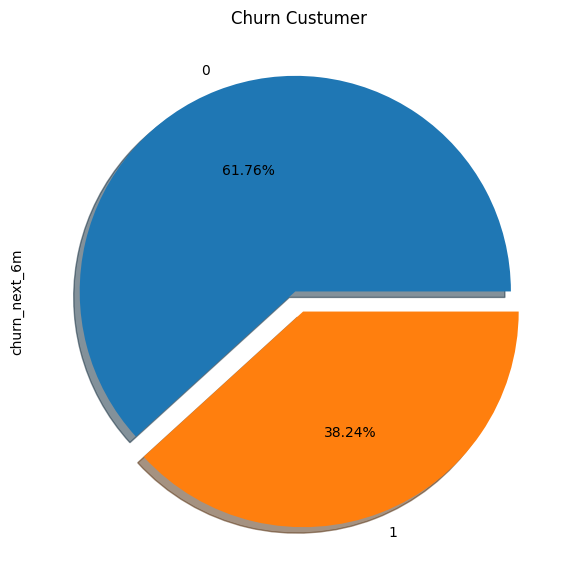

In [120]:
#First, let check the rate at which Seller are churning.

df['churn_next_6m'].value_counts().plot.pie(explode=[0.05,0.05],shadow=True,autopct='%1.2f%%',title='Churn Custumer',figsize=(15,7))

1 stand for Seller who have churn

while 0 Stand for Custumer who still remain in the company.

We the look of thiings we till gat ssller who till retain their work than the seller who ave churn.

why did they Churn ????

<Axes: >

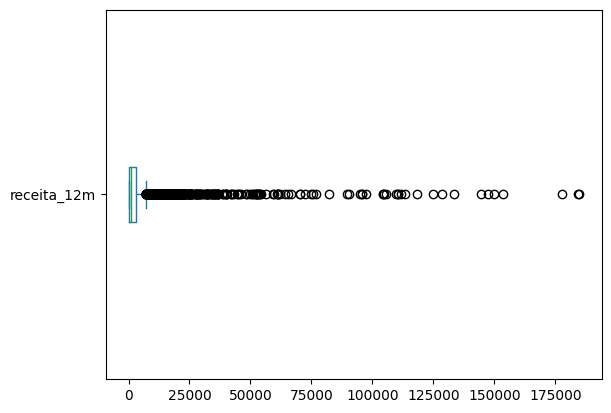

In [121]:
#checking for the Model Revenune

df['receita_12m'].plot.box(vert=False)

Excesssive Values

In [122]:
#let check for data format???

df.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [123]:
#giving the date column the proper format

df['data_ref_safra']=df['data_ref_safra'].astype('datetime64[ns]')

<ipython-input-124-59f13f9b79a6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.set_index('data_ref_safra').resample('M').sum()['receita_12m'].plot.bar(figsize=(10,7),title='Monthly Sales')


<Axes: title={'center': 'Monthly Sales'}, xlabel='data_ref_safra'>

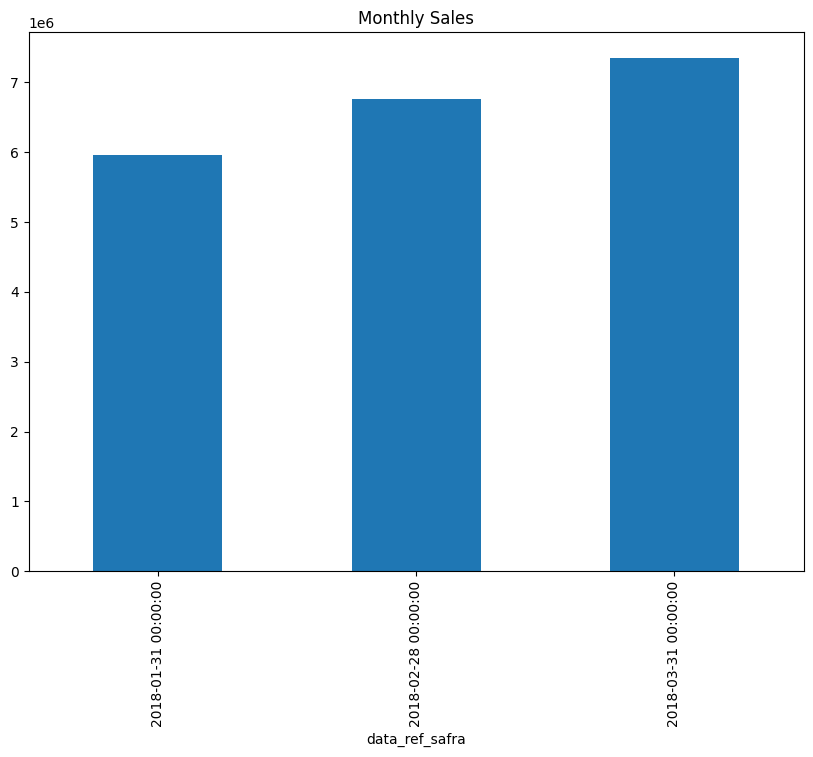

In [124]:
#let the monthly sales.

df.set_index('data_ref_safra').resample('M').sum()['receita_12m'].plot.bar(figsize=(10,7),title='Monthly Sales')

Just 3month Sales, we aleady have 38 % of Sellers churn away..

now what making them churning away ???

In [125]:
#now let create a variable for retain custumer and churn custumer
churn_df=df.query('churn_next_6m==1')
retain_df=df.query('churn_next_6m==0')

In [126]:
#this is Churn custumer table

churn_df

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
5,2018-01-01,00ab3eff1b5192e5f1a63bcecfee11c8,SP,1,1,1,98.00,288,1
7,2018-01-01,010543a62bd80aa422851e79a3bc7540,SP,2,2,1,1416.00,151,1
15,2018-01-01,01ed254b9ff8407dfb9d99ba1e17d923,SP,5,5,2,1465.99,53,1
...,...,...,...,...,...,...,...,...,...
5351,2018-03-01,fe26f3ecb51a15e6d8335cd92da42562,SP,7,7,7,2708.96,10,1
5353,2018-03-01,fe4cd9461203cee790d36792420b310f,MG,3,3,2,391.15,175,1
5360,2018-03-01,ff314fa6033cc68ec451c47aee2d6ba4,SP,1,1,1,258.00,285,1
5362,2018-03-01,ff4ea69c2a729e83e63c7579e4ef8170,SP,7,7,3,5719.00,281,1


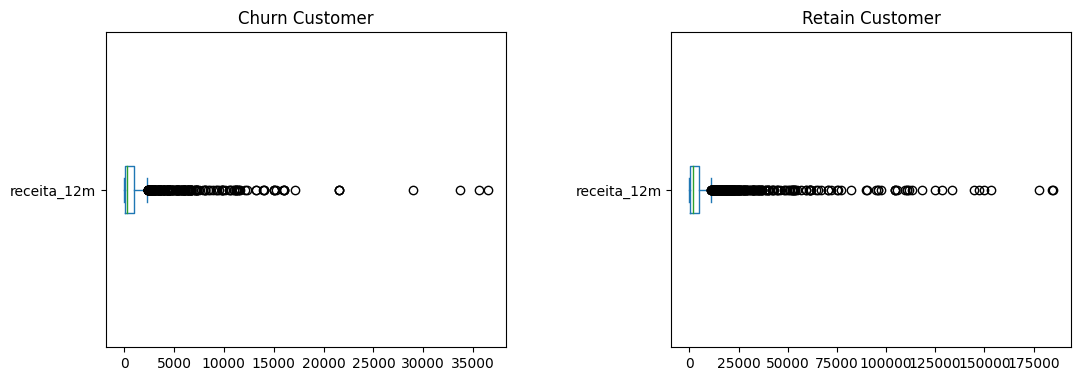

In [127]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
churn_df['receita_12m'].plot.box(vert=False,ax=ax[0],title='Churn Customer')
retain_df['receita_12m'].plot.box(vert=False,ax=ax[1],title='Retain Customer')
plt.tight_layout(pad=5)

Both The Churn custumer and retain custumer have excessive Values.
infact the retain custumers have more excessive sales than the churn custumers


In [128]:
retain_df

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0
6,2018-01-01,00ee68308b45bc5e2660cd833c3f81cc,SP,40,49,12,4641.00,2,0
8,2018-01-01,013900e863eace745d3ec7614cab5b1a,PR,10,13,10,768.70,9,0
...,...,...,...,...,...,...,...,...,...
5363,2018-03-01,ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,SP,12,12,7,13432.80,0,0
5365,2018-03-01,ffc470761de7d0232558ba5e786e57b7,SP,5,5,5,385.59,0,0
5366,2018-03-01,ffdd9f82b9a447f6f8d4b91554cc7dd3,PR,11,12,8,1450.20,7,0
5367,2018-03-01,ffeee66ac5d5a62fe688b9d26f83f534,SP,13,13,3,1709.87,0,0


In [129]:
def minmax(X):
  minimum=churn_df[X].idxmin()
  maximum=churn_df[X].idxmax()
  maximax=pd.DataFrame(churn_df.loc[minimum,:])
  minimin=pd.DataFrame(churn_df.loc[maximum,:])
  return pd.concat([maximax,minimin],axis=1)


In [130]:
minmax('tot_orders_12m')

,3,831
data_ref_safra,2018-01-01 00:00:00,2018-01-01 00:00:00
seller_id,003554e2dce176b5555353e4f3555ac8,7aa4334be125fcdd2ba64b3180029f14
uf,GO,SP
tot_orders_12m,1,214
tot_items_12m,1,237
tot_items_dist_12m,1,39
receita_12m,120.0,16012.95
recencia,16,18
churn_next_6m,1,1


for churn_custumer, the highest total order for the past 3 month is 214

In [131]:
minmax('tot_items_12m')

,3,831
data_ref_safra,2018-01-01 00:00:00,2018-01-01 00:00:00
seller_id,003554e2dce176b5555353e4f3555ac8,7aa4334be125fcdd2ba64b3180029f14
uf,GO,SP
tot_orders_12m,1,214
tot_items_12m,1,237
tot_items_dist_12m,1,39
receita_12m,120.0,16012.95
recencia,16,18
churn_next_6m,1,1


for churn_custumer, the highest total items for the past 3 month is 237

In [132]:
minmax('tot_items_dist_12m')

,0,3245
data_ref_safra,2018-01-01 00:00:00,2018-02-01 00:00:00
seller_id,0015a82c2db000af6aaaf3ae2ecb0532,dd2bdf855a9172734fbc3744021ae9b9
uf,SP,MG
tot_orders_12m,3,100
tot_items_12m,3,105
tot_items_dist_12m,1,41
receita_12m,2685.0,9957.5
recencia,74,27
churn_next_6m,1,1


for the past three Month, The highest Total Number is 41

In [133]:
def minmaxx(X):
  minimum=retain_df[X].idxmin()
  maximum=retain_df[X].idxmax()
  maximax=pd.DataFrame(retain_df.loc[minimum,:])
  minimin=pd.DataFrame(retain_df.loc[maximum,:])
  return pd.concat([maximax,minimin],axis=1)

In [134]:
#The highest total_order for last 3month;

minmaxx('tot_orders_12m')

,10,5003
data_ref_safra,2018-01-01 00:00:00,2018-03-01 00:00:00
seller_id,014d9a685fd57276679edd00e07089e5,cc419e0650a3c5ba77189a1882b7556a
uf,PR,SP
tot_orders_12m,1,1351
tot_items_12m,1,1405
tot_items_dist_12m,1,33
receita_12m,69.99,82367.19
recencia,38,0
churn_next_6m,0,0


In [135]:
##for the retain custumer, The highest total_items_of_purchase for the last 3month;

minmaxx('tot_items_12m')

,10,5003
data_ref_safra,2018-01-01 00:00:00,2018-03-01 00:00:00
seller_id,014d9a685fd57276679edd00e07089e5,cc419e0650a3c5ba77189a1882b7556a
uf,PR,SP
tot_orders_12m,1,1351
tot_items_12m,1,1405
tot_items_dist_12m,1,33
receita_12m,69.99,82367.19
recencia,38,0
churn_next_6m,0,0


In [136]:
##for the retain custumer, The highest receita_12m for the last 3month;

minmaxx('receita_12m')

,417,4123
data_ref_safra,2018-01-01 00:00:00,2018-03-01 00:00:00
seller_id,3d62f86afa7c73be2628a3be1423f5a0,53243585a1d6dc2643021fd1853d8905
uf,SP,BA
tot_orders_12m,1,251
tot_items_12m,1,271
tot_items_dist_12m,1,21
receita_12m,6.0,184878.31
recencia,18,17
churn_next_6m,0,0


Now let compare and Contrast the monthhly sales for past three month

In [137]:
#This for the churn custumer for thee past 3month

minmax('receita_12m')

,804,598
data_ref_safra,2018-01-01 00:00:00,2018-01-01 00:00:00
seller_id,77128dec4bec4878c37ab7d6169d6f26,59417c56835dd8e2e72f91f809cd4092
uf,SP,SP
tot_orders_12m,1,18
tot_items_12m,1,18
tot_items_dist_12m,1,9
receita_12m,6.5,36459.0
recencia,291,90
churn_next_6m,1,1


The Highest Revenue by retain seller is about 7 digit IN BA state while the lowest is 6 and till retaining The job.

The highest Revenue by Chrun seller is about 36459 why the lowest sales is 6.5 in the SP State.

In [138]:
df['uf'].value_counts()

SP    3184
PR     627
MG     482
SC     330
RJ     288
RS     188
DF      68
GO      60
BA      28
ES      22
CE      20
PE      15
MT       9
RN       9
MS       9
PB       8
RO       6
SE       6
AM       3
PA       3
MA       2
PI       2
Name: uf, dtype: int64

it save to say SP is the home base of the seller country.

In [139]:
from colorama import Fore

In [140]:
#now figure out which state we gat more churn.

print(Fore.RED,churn_df['uf'].value_counts())
print(Fore.BLUE,retain_df['uf'].value_counts())

 SP    1203
PR     239
MG     192
SC     144
RJ     109
RS      83
GO      22
DF      16
ES      10
CE       7
BA       6
MS       6
PE       3
PB       3
AM       3
RO       3
SE       3
PA       1
Name: uf, dtype: int64
 SP    1981
PR     388
MG     290
SC     186
RJ     179
RS     105
DF      52
GO      38
BA      22
CE      13
ES      12
PE      12
MT       9
RN       9
PB       5
SE       3
MS       3
RO       3
PA       2
MA       2
PI       2
Name: uf, dtype: int64


In every State we have 2 or more churn seller The heighest of it all is SP state with the total number of 1203 churn selller while lowest churn state is PA with just one Churn seller out of 3 total sellers in the state.

lastly only PI state we didn't recognize any churn sellers.

In [141]:
df.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [142]:
churn_df.head(10)

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
5,2018-01-01,00ab3eff1b5192e5f1a63bcecfee11c8,SP,1,1,1,98.00,288,1
7,2018-01-01,010543a62bd80aa422851e79a3bc7540,SP,2,2,1,1416.00,151,1
15,2018-01-01,01ed254b9ff8407dfb9d99ba1e17d923,SP,5,5,2,1465.99,53,1
19,2018-01-01,024b564ae893ce8e9bfa02c10a401ece,SP,1,2,1,239.00,322,1
20,2018-01-01,028872bfa080090a9d0abd4f1af168f8,MG,1,3,1,70.50,134,1
25,2018-01-01,0307f7565ff85b299b6e5ef162b1b1a9,SP,5,5,5,4695.00,220,1
34,2018-01-01,052577151711aec5c744fe12e66db3e1,SC,1,1,1,687.00,66,1
44,2018-01-01,062ce95fa2ad4dfaedfc79260130565f,RS,54,59,14,7479.10,112,1


In [143]:
minmax('recencia')

,1375,2105
data_ref_safra,2018-01-01 00:00:00,2018-02-01 00:00:00
seller_id,cd843d4cf8ef32827de0396605163ba3,3a52d63a8f9daf5a28f3626d7eb9bd28
uf,MG,SP
tot_orders_12m,4,1
tot_items_12m,4,1
tot_items_dist_12m,3,1
receita_12m,1546.0,35.0
recencia,0,364
churn_next_6m,1,1


In [144]:
minmaxx('recencia')

,88,4769
data_ref_safra,2018-01-01 00:00:00,2018-03-01 00:00:00
seller_id,0bae85eb84b9fb3bd773911e89288d54,acb6c2ca5c82411c1fdb88d5fd5eb95e
uf,SP,SP
tot_orders_12m,78,4
tot_items_12m,85,4
tot_items_dist_12m,34,1
receita_12m,4484.15,211.6
recencia,0,355
churn_next_6m,0,0


The Recencia columns which means the Number of Days since the last purchase from the seller is made???

This is to tell you That the Company is BIAS. I have sellers whose their last sold is 355 days that is Almost a Year and till retain him in the company while the sales is Poor. while some other Guys(churn Guys) whose last Sales is almost a Year and the sales record is poor but till retain him In the company.

other Thinigs might give birth to their retain and churn, but according to This dataset one can conclude that The company is bias.

In [145]:
df.head()

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m
0,2018-01-01,0015a82c2db000af6aaaf3ae2ecb0532,SP,3,3,1,2685.00,74,1
1,2018-01-01,001cca7ae9ae17fb1caed9dfb1094831,ES,171,207,9,21275.23,2,0
2,2018-01-01,002100f778ceb8431b7a1020ff7ab48f,SP,38,42,15,781.80,2,0
3,2018-01-01,003554e2dce176b5555353e4f3555ac8,GO,1,1,1,120.00,16,1
4,2018-01-01,004c9cd9d87a3c30c522c48c4fc07416,SP,130,141,75,16228.88,8,0


In [146]:
#let Me Pick out Month fro th date to add to our features

df['month']=df['data_ref_safra'].dt.month

In [147]:
df.sample(2)

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m,month
3326,2018-02-01,e9bc59e7b60fc3063eb2290deda4cced,PR,93,127,30,18061.25,11,0,2
5364,2018-03-01,ff82e8873fba613f2261a9acc896fd84,MG,4,4,3,124.60,12,1,3


In [148]:
from sklearn.preprocessing import LabelEncoder

code=LabelEncoder()
df['seller_id']=code.fit_transform(df['seller_id'])
df['uf']=code.fit_transform(df['uf'])

In [149]:
df.sample(3)

,data_ref_safra,seller_id,uf,tot_orders_12m,tot_items_12m,tot_items_dist_12m,receita_12m,recencia,churn_next_6m,month
2465,2018-02-01,837,14,7,11,4,144.33,3,0,2
4517,2018-03-01,1060,14,7,7,3,306.50,0,0,3
3799,2018-03-01,311,21,5,5,5,675.00,29,1,3


In [150]:
#Importing the Library for ML

import keras
from keras.models import Sequential
from keras.layers import Dense

In [151]:
X=df.drop(['churn_next_6m','data_ref_safra'],1)

y=df['churn_next_6m']

<ipython-input-151-502794414ea2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop(['churn_next_6m','data_ref_safra'],1)


In [152]:
X.shape

(5369, 8)

In [153]:
models=Sequential()
models.add(Dense(50,input_dim=8,activation='relu'))
models.add(Dense(30,activation='relu'))
models.add(Dense(20,activation='relu'))
models.add(Dense(10,activation='relu'))
models.add(Dense(5,activation='relu'))
models.add(Dense(1,activation='sigmoid'))

In [154]:
from keras.src.losses import binary_crossentropy
models.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.3, random_state=101)

In [156]:
import keras
from IPython.display import  clear_output

In [157]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()



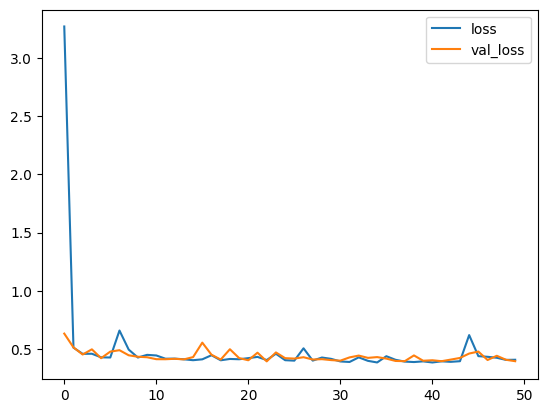

118/118 [==============================] - 1s 5ms/step - loss: 0.4079 - accuracy: 0.8324 - val_loss: 0.3954 - val_accuracy: 0.8270


In [158]:
models.fit(X_train,y_train,epochs=50,callbacks=[plot_losses],verbose=1,validation_data=(X_eval,y_eval))

Not a bad result.

there is a chances that if we increase the epochs figure we might get A better result

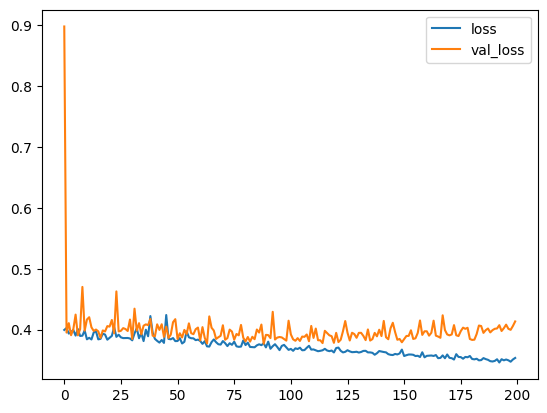

118/118 [==============================] - 1s 6ms/step - loss: 0.3535 - accuracy: 0.8417 - val_loss: 0.4135 - val_accuracy: 0.8287


In [159]:
#let give it a try

models.fit(X_train,y_train,epochs=200,callbacks=[plot_losses],verbose=1,validation_data=(X_eval,y_eval))

Definitely there is an decrease in loss and increase in Accuracy due to increase in epochs...

This Result stand strong.

Let see if we can increase the model accuracy and also reduces The losses.

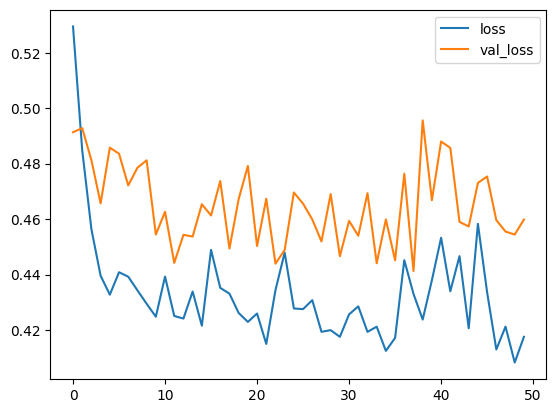

118/118 [==============================] - 1s 7ms/step - loss: 0.4175 - accuracy: 0.8260 - val_loss: 0.4598 - val_accuracy: 0.7913


In [160]:
model=Sequential()
model.add(Dense(50,input_dim=8,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(20,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(5,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,callbacks=[plot_losses],verbose=1,validation_data=(X_test,y_test))

let increase the epochs there is a  sign is goiing to increase in accuracy if will increase the number of epochs by the initial X_test y_test

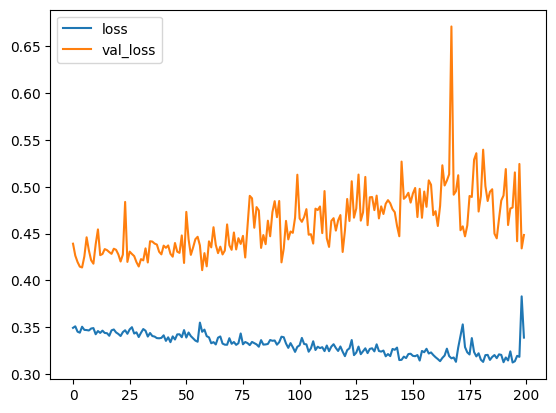

118/118 [==============================] - 1s 9ms/step - loss: 0.3389 - accuracy: 0.8497 - val_loss: 0.4485 - val_accuracy: 0.8223


In [161]:
history=models.fit(X_train,y_train,epochs=200,callbacks=[plot_losses],verbose=1,validation_data=(X_test,y_test))

there is an incraese  and decrease in the accuracy of the result.
which is a good improvement.

<Axes: >

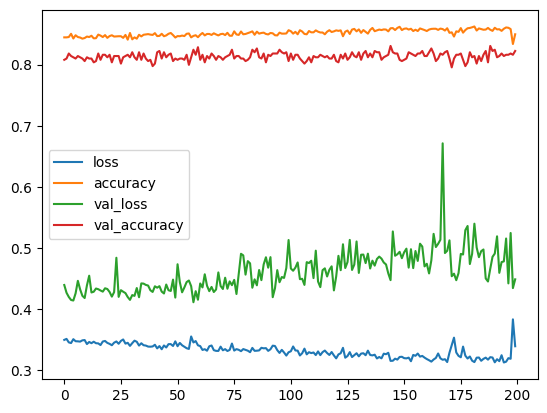

In [162]:
pd.DataFrame(history.history).plot()

In [163]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 50)                450       
                                                                 
 dense_43 (Dense)            (None, 30)                1530      
                                                                 
 dense_44 (Dense)            (None, 20)                620       
                                                                 
 dense_45 (Dense)            (None, 10)                210       
                                                                 
 dense_46 (Dense)            (None, 5)                 55        
                                                                 
 dense_47 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2871 (11.21 KB)
Trainable params: 2871 (

In [164]:
models.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 50)                450       
                                                                 
 dense_37 (Dense)            (None, 30)                1530      
                                                                 
 dense_38 (Dense)            (None, 20)                620       
                                                                 
 dense_39 (Dense)            (None, 10)                210       
                                                                 
 dense_40 (Dense)            (None, 5)                 55        
                                                                 
 dense_41 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2871 (11.21 KB)
Trainable params: 2871 (

In [166]:
models.evaluate(X_train,y_train)
models.evaluate(X_test,y_test)


16/16 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.8223


[0.4484737515449524, 0.8223140239715576]

In [168]:

models.evaluate(X_eval,y_eval)

36/36 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8314


[0.43055328726768494, 0.831410825252533]

In [ ]:
import pickle as pk

with open ('models.pk','wb') as files:
  pk.dump(model.file)